In [12]:
from keras.models import load_model
import os
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = [5,8]

In [2]:
model=load_model('binary_pred.h5')  # Loading saved model.

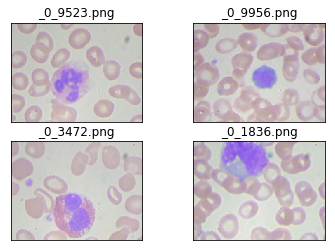

In [13]:
RAW_PATH = '/volumes/data/wht_bld_cell_clasfy/images/NEW_PREDICTION'

resize_row_size = 120
resize_col_size = 160

for i,image_name in enumerate(os.listdir(RAW_PATH)):
    img = cv2.imread(os.path.join(RAW_PATH, image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if i<2:
        plt.subplot(2,2,i+1)
    else:
        plt.subplot(2,2,i+1)
    plt.imshow(img), plt.title(image_name)
    plt.xticks([]), plt.yticks([])
    
plt.show()

In [14]:
def preprocess(path):
    X = []
    for i,image_name in enumerate(os.listdir(path)):
        img = cv2.imread(os.path.join(path, image_name))
        img = scipy.misc.imresize(arr=img, size=(resize_row_size, resize_col_size, 3))
        img_arr = np.asarray(img)
        X.append(img_arr)
    X = np.asarray(X)
    X = X * 1./255.  #Getting data in 0-1 range
    return X 

In [15]:
def predict(image_path):
    X= preprocess(image_path)
    y_pred = np.rint(model.predict(X))
    return y_pred

In [34]:
predicted = predict(RAW_PATH)
predicted=predicted.astype(int).flatten().tolist()

In [36]:
print('1 corresponds to polynuclear, and 0 to mononuclear')
print(predicted)

1 corresponds to polynuclear, and 0 to mononuclear
[1, 0, 1, 0]


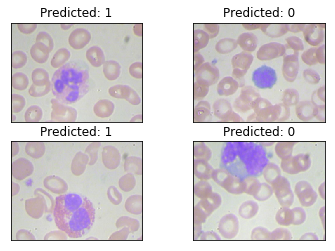

In [37]:
for i,image_name in enumerate(os.listdir(RAW_PATH)):
    img = cv2.imread(os.path.join(RAW_PATH, image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if i<2:
        plt.subplot(2,2,i+1)
    else:
        plt.subplot(2,2,i+1)
    plt.imshow(img), plt.title('Predicted: ' + str(predicted[i]))
    plt.xticks([]), plt.yticks([])
    
plt.show()